In [1]:
!pip install gym


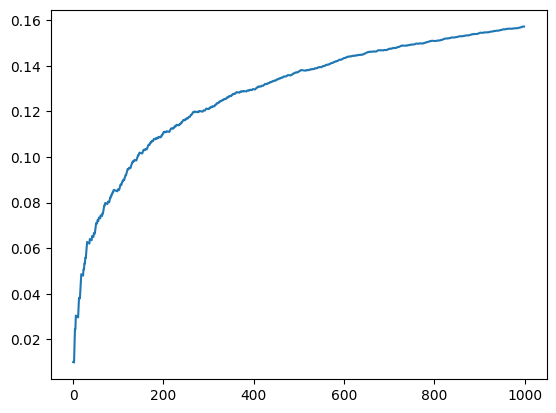

In [2]:
# Stochastic approximations
#
# Let us start with a simple problem, where we estimate the mean of a random variable
import numpy as np
E_X = 0.4
T = 1000
X = np.random.choice([0,1], size=T, p=[1-E_X, E_X])
mean = np.zeros(T)
# ... estimator
cmean = 0
alpha = 0.001
# For tih
for t in range(T):
    alpha = 0.1/(10 + t)
    #cmean = (X[t] + cmean*t)/[t+1]
    #cmean = X[t] / (t+1) + cmean  * t/(t+1)
    #cmean = cmean - cmean + X[t] / (t+1) + cmean  * t/(t+1)
    #cmean = cmean  + X[t] / (t+1) - cmean * (1)/(t+1)
    cmean += (X[t] - cmean) * alpha
    mean[t] = cmean
import matplotlib.pyplot as plt
plt.plot(mean)


# Conditions

$\sum_t \alpha_t = \infty$ and
$\sum_t \alpha_t^2 < \infty$


In [3]:
import sys
sys.path.insert(0, '../MDP')
import MDP
import chain


In [4]:
# Monte-Carlo Estimation
environment = chain.Chain(5)
mdp = environment.getMDP()


# Approximation error

After $T$ steps, the remaining reward is up to $\gamma^T / (1 - \gamma)$ for bounded rewards in $[0,1]$. This means that to get an approximation of $\epsilon$,
you need $T = \ln \epsilon (1 - \gamma) / \ln \gamma$

Alternatively, stop the simulation with probability $1 - \gamma$ at each step. This give you an unbiased estimate.

In [23]:
n_states = 5
n_actions = 2
gamma = 0.99

Q = np.zeros([n_states, n_actions])
N = np.zeros([n_states, n_actions])

# here we assume we have a policy as an array
policy = np.ones(n_states, dtype=int) 

for ex in range(10000):
    state = np.random.choice(n_states)
    action = np.random.choice(n_actions)
    environment.state = state
    utility = 0
    saved_action = action
    while (1):
        new_state, reward, done, infos = environment.step(action)
        utility += reward
        if (np.random.uniform() < 1 - gamma):
            break
        action = policy[new_state]
    Q[state, saved_action] += (utility - Q[state, saved_action])/(1 + N[state, saved_action])
    N[state, saved_action] += 1

In [24]:
print(Q)


[[16.41476091 16.36259542]
 [16.82404692 16.79379379]
 [16.46571136 17.16534653]
 [16.75727182 18.12562814]
 [18.58989899 17.55955956]]
